# Linear Regression

In [113]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Implementing the Linear Regression Model

In [101]:
class IterativeLinearRegression:
    def __init__(self, lr=0.001, max_iters=40000, mini_batch_size=None, eps=0.1) -> None:
        self.lr = lr
        self.eps = eps
        self.max_iters = max_iters
        
        if mini_batch_size == 0:
            raise ValueError("mini batch size cannot be 0")
        else:
            self.mini_batch_size = mini_batch_size
        
        self.params = None
        
        
    def fit(self, X: np.array, y: np.array) -> None:
        # initialize w and X_til
        X_til =  np.c_[np.ones(len(X)), X]
        w = np.zeros(X_til.shape[1])
        
        if self.mini_batch_size is None and len(X) > 500:
            self.mini_batch_size = len(X) // 5
        
        # SGD
        X_mini, y_mini = X_til, y
        for _ in range(self.max_iters):
            # select a mini batch 
            if self.mini_batch_size is not None:
                indices = np.random.choice(len(X_til), self.mini_batch_size)
                X_mini = X_til[indices]
                y_mini = y[indices]
            
            
            grad = self.get_grad(w, X_mini, y_mini)
            
            if self.magnitude(grad) < self.eps:
                break
                
            w -= self.lr * grad
            
            if np.nan in w:
                raise ValueError("Nan in at least one of the parameters")
        
        self.params = w
    
    def predict(self, X: np.array) -> np.array:
        return np.c_[np.ones(len(X)), X] @ self.params
    
    def get_grad(self, w, X_til, y) -> np.array:
        return 2*X_til.T@(X_til@w - y)
        
    def magnitude(self, v) -> np.array:
        # euclidean norm
        return np.sqrt(np.sum(v**2))

# Generating a toy data

In [102]:
X, y, coef = make_regression(n_samples=200, n_features=1, noise=10, bias=1, coef=True, random_state=0)

In [103]:
coef

array(96.19363785)

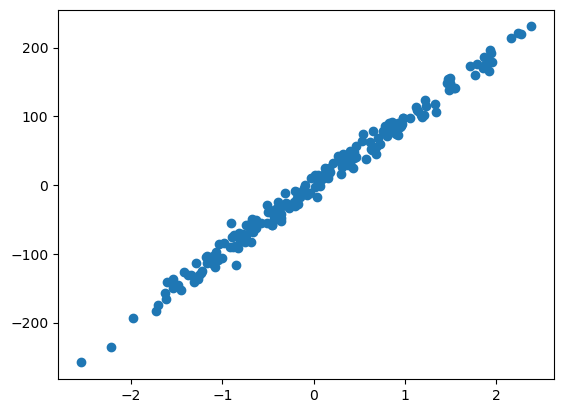

In [104]:
plt.scatter(X,y)

# Train the model using the toy data

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [109]:
model = IterativeLinearRegression(lr=0.001)
model.fit(X_train, y_train)

# Predicting on the testing data

In [110]:
model.params

array([-0.6446956 , 96.60801107])

It seems that there are quite large error of 81 units.

In [114]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

81.44124106596217

However, if we plot the predicted and true data, we can actually see that our model is not too bad.

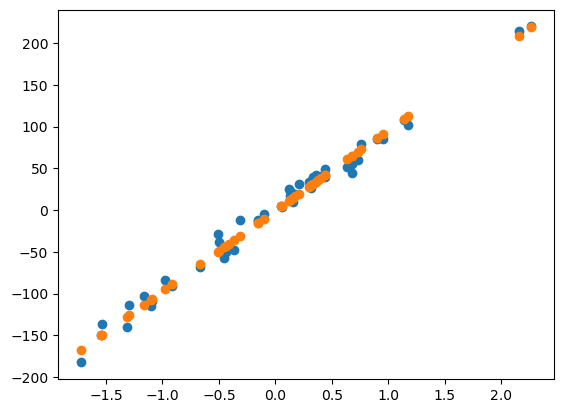

In [115]:
plt.scatter(X_test,y_test)
# plt.plot(np.linspace(-3, 2.5), [model.params[0] + x*model.params[1] for x in np.linspace(-3, 2.5)], c="red")
plt.scatter(X_test, y_pred)